In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
os.chdir('/home/sdr/Pictures/The scholar/Data analysis/Assignment 2')
h1b=pd.read_csv('H1b data.csv',encoding='ISO-8859-2')
sp=pd.read_csv('states population.csv')
nc=pd.read_csv('naics codes.csv',encoding='ISO-8859-2')
nc=nc.drop('Unnamed: 2',axis=1)
sp

,EMPLOYER_STATE,State,Population estimate
0,CA,California,39250017
1,TX,Texas,27862596
2,FL,Florida,20612439
3,NY,New York,19745289
4,PA,Pennsylvania,12802503
5,IL,Illinois,12801539
6,OH,Ohio,11614373
7,GA,Georgia,10310371
8,NC,North Carolina,10146788
9,MI,Michigan,9928301


# What are the top 10 occupations for H1B visas with certified status?

In [2]:
q1=h1b.where(h1b['CASE_STATUS']=='CERTIFIED')
q1=q1.where(q1['VISA_CLASS']=='H-1B')
q1=q1.dropna()
q1['JOB_TITLE'].value_counts().head(10)

PROGRAMMER ANALYST          5223
SOFTWARE ENGINEER           3116
SOFTWARE DEVELOPER          1450
SYSTEMS ANALYST             1234
SENIOR SOFTWARE ENGINEER    1201
COMPUTER PROGRAMMER          888
DEVELOPER                    733
BUSINESS ANALYST             729
COMPUTER SYSTEMS ANALYST     657
APPLICATION DEVELOPER        629
Name: JOB_TITLE, dtype: int64

# Which company hires more data scientists?

In [3]:
q2=h1b.where(h1b['JOB_TITLE']=='DATA SCIENTIST')
q2=q2.dropna()
q2['EMPLOYER_NAME'].value_counts()

MICROSOFT CORPORATION                         40
FACEBOOK, INC.                                12
UBER TECHNOLOGIES, INC.                        6
INTEL CORPORATION                              4
SCHLUMBERGER TECHNOLOGY CORPORATION            4
                                              ..
INTUIT INC.                                    1
RED BEACON, INC.                               1
PHILIPS LIGHTING NORTH AMERICA CORPORATION     1
VIGNET, INC.                                   1
SQUARE, INC.                                   1
Name: EMPLOYER_NAME, Length: 84, dtype: int64

# What is the average salary for data scientists? How it is compared to the mean of applications?

average Data Scientist Salary:  88646.04320987655
Average salary of top 10 job title
                                              JOB_TITLE  PREVAILING_WAGE
3779                          CRITICAL CARE INTENSIVIST         349410.0
549                                 ANESTHESIOLOGIST MD         337760.0
18345               STAFF PHYSICIAN (SURGICAL ONCOLOGY)         300600.0
2828           CHAIRMAN, DEPT OF PSYCHIATRY (PROFESSOR)         284211.0
10305       PHYSICIAN - MEDICAL ONCOLOGIST/HEMATOLOGIST         283668.0
18671                                SURGEON--PHYSICIAN         283421.0
5764   EXECUTIVE VICE PRESIDENT & CHIEF MEDICAL OFFICER         280696.0
18183       SR. VICE PRESIDENT OF CORPORATE DEVELOPMENT         278325.0
3780                          CRITICAL CARE NEUROLOGIST         276661.0
1761                                    ASSOCIATE STAFF         270703.0


<AxesSubplot:xlabel='JOB_TITLE', ylabel='PREVAILING_WAGE'>

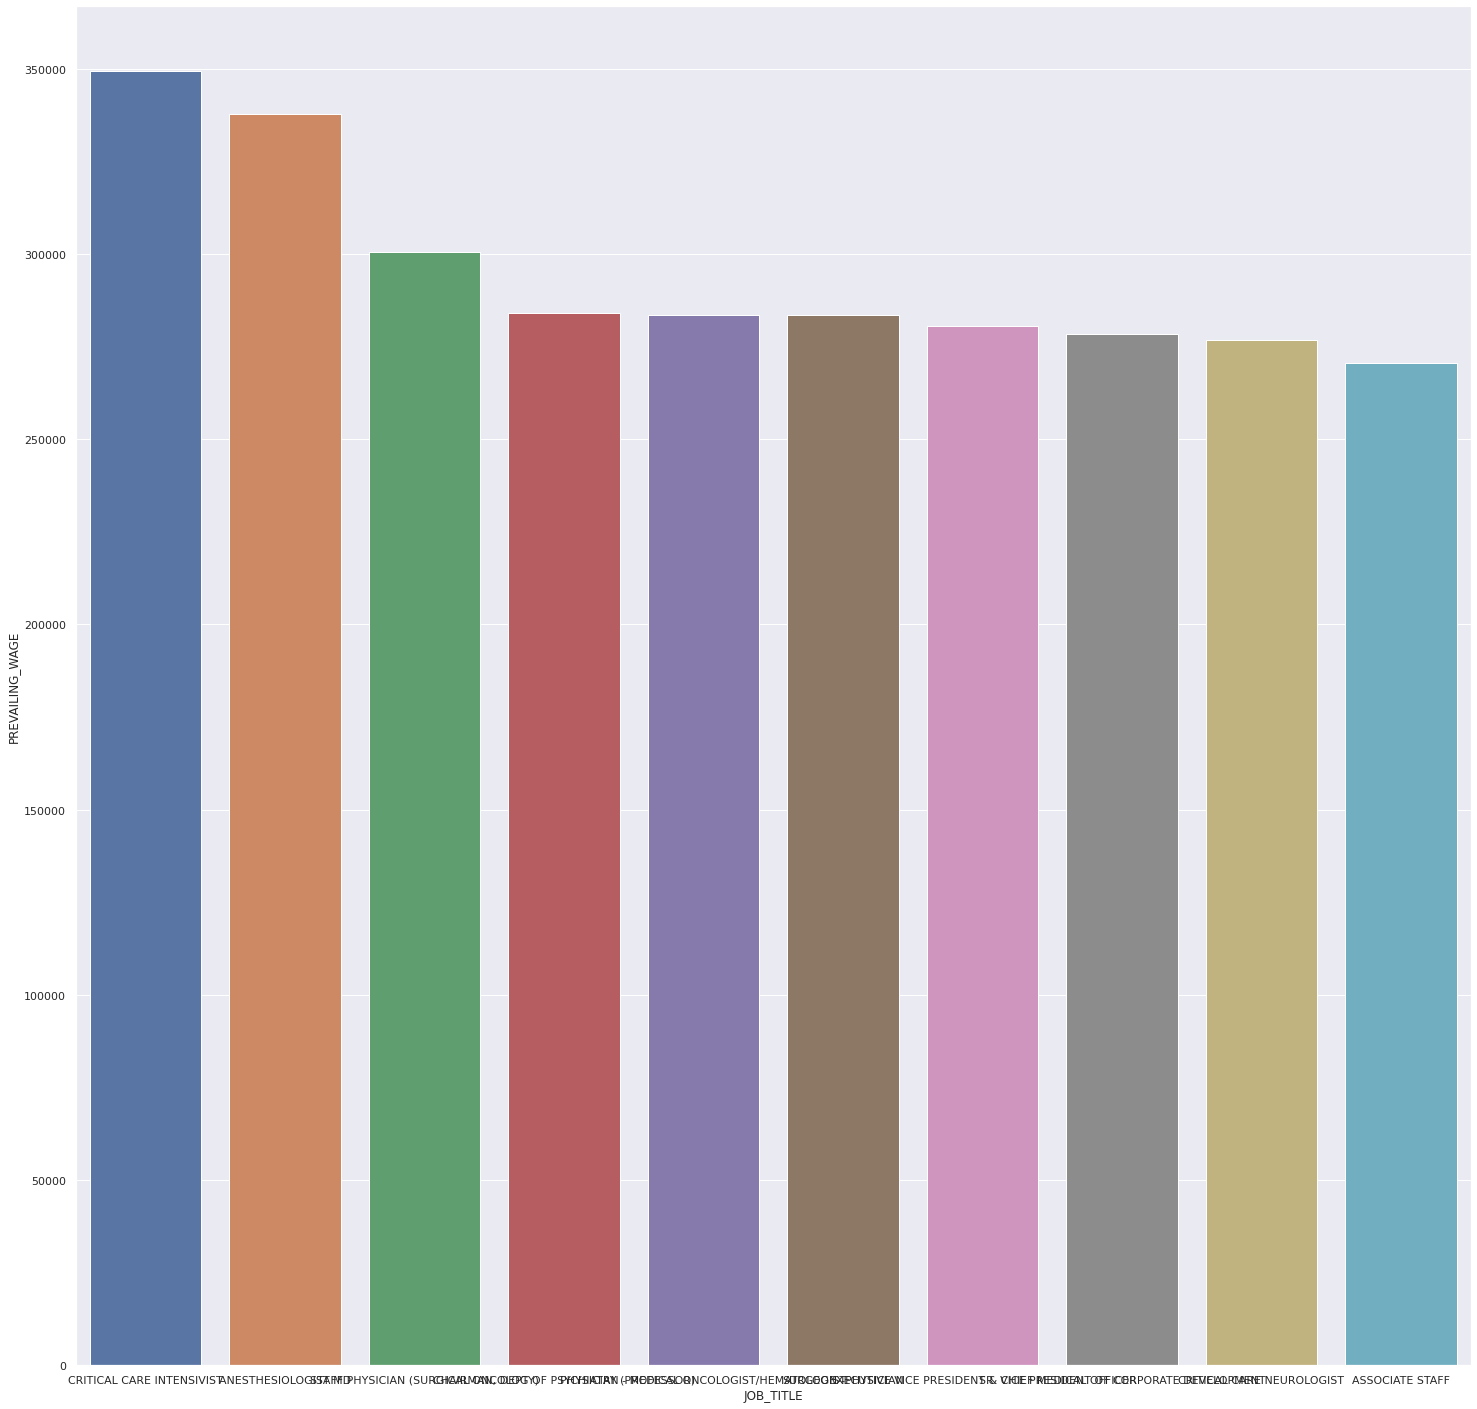

In [4]:
q3=h1b.where(h1b['JOB_TITLE']=='DATA SCIENTIST')
q3=q3.dropna()
print('average Data Scientist Salary: ',q3['PREVAILING_WAGE'].mean())
q3=h1b.groupby(h1b['JOB_TITLE'],as_index=False).mean()
q3=q3.drop(['NAICS_CODE'],axis=1)
print('Average salary of top 10 job title')
q3=q3.nlargest(10,'PREVAILING_WAGE')
print(q3)
sns.set(font_scale=0.2)
sns.set(rc={'figure.figsize':(25,25)})
sns.barplot(x='JOB_TITLE',y='PREVAILING_WAGE',data=q3)

# Which state has the higher deny proportionally to application. And proportionally to the population?

In [34]:
q4=h1b.merge(sp,on='EMPLOYER_STATE')
q4=q4.where(q4['CASE_STATUS']=='DENIED')
q4=q4.dropna()
print('state of higher deny w.r.t Application: ',q4['State'].value_counts().head(1))
q4=q4.groupby('State',as_index=False).mean()
q4=q4.drop(['NAICS_CODE','PREVAILING_WAGE'],axis=1)
q4.nlargest(5,'Population estimate')

state of higher deny w.r.t Application:   California    256
Name: State, dtype: int64


,State,Population estimate
4,California,39250017.0
37,Texas,27862596.0
8,Florida,20612439.0
29,New York,19745289.0
33,Pennsylvania,12802503.0


# What industries are in the top 5 percentile of applications?

In [6]:
q5=h1b.merge(nc,on='NAICS_CODE')
q5=q5.where(q5['CASE_STATUS']=='CERTIFIED').dropna()
q5['NAICS Title'].value_counts().head(5)

Custom Computer Programming Services            28083
Custom Computer Programming Services            28083
Computer Systems Design and Related Services    15548
Software Publishers                              4774
Computer Systems Design Services                 4417
Name: NAICS Title, dtype: int64

# Does the month of the application play any role in to denied process? What about decision dates?

In [36]:
q6=h1b
q6[["day", "month", "year"]] = q6["CASE_SUBMITTED"].str.split("-", expand = True)
#h1b["CASE_SUBMITTED"]
q6=q6.where(q6['CASE_STATUS']=='DENIED').dropna()
print('which clearly indicates that 10th , 11th and 12th month are likley to get more chances of Deniel')
q6['month'].value_counts().head(10)

which clearly indicates that 10th , 11th and 12th month are likley to get more chances of Deniel


11    460
10    443
12    407
09     55
Name: month, dtype: int64

In [43]:
q61=h1b
q61[["day", "month", "year"]] = q61["DECISION_DATE"].str.split("-", expand = True)
q61=q61.where(q61['CASE_STATUS']=='DENIED').dropna()
q61['day'].value_counts()
q61['month'].value_counts()
q61['year'].value_counts()
q61['DECISION_DATE'].value_counts().head(35)

16-11-16    44
14-12-16    38
28-11-16    38
12-12-16    33
15-11-16    33
26-10-16    33
17-10-16    32
24-10-16    31
01-12-16    31
17-11-16    31
13-10-16    30
22-12-16    29
22-11-16    29
19-10-16    28
05-12-16    28
04-10-16    28
05-10-16    26
30-11-16    26
27-10-16    25
31-10-16    25
21-11-16    25
29-12-16    25
02-11-16    25
07-11-16    25
10-11-16    25
08-12-16    24
14-10-16    24
15-12-16    24
06-12-16    24
29-11-16    24
04-11-16    23
27-12-16    23
07-12-16    23
13-12-16    23
09-12-16    23
Name: DECISION_DATE, dtype: int64

In [38]:
print('which indicates that we havent find any relation between the decision_date and deniel' )

which indicates that we havent find any relation between the decision_date and deniel


# Come up with more detailed insights from the dataset

Counting certified case status in VISA_Class


<AxesSubplot:xlabel='VISA_CLASS', ylabel='count'>

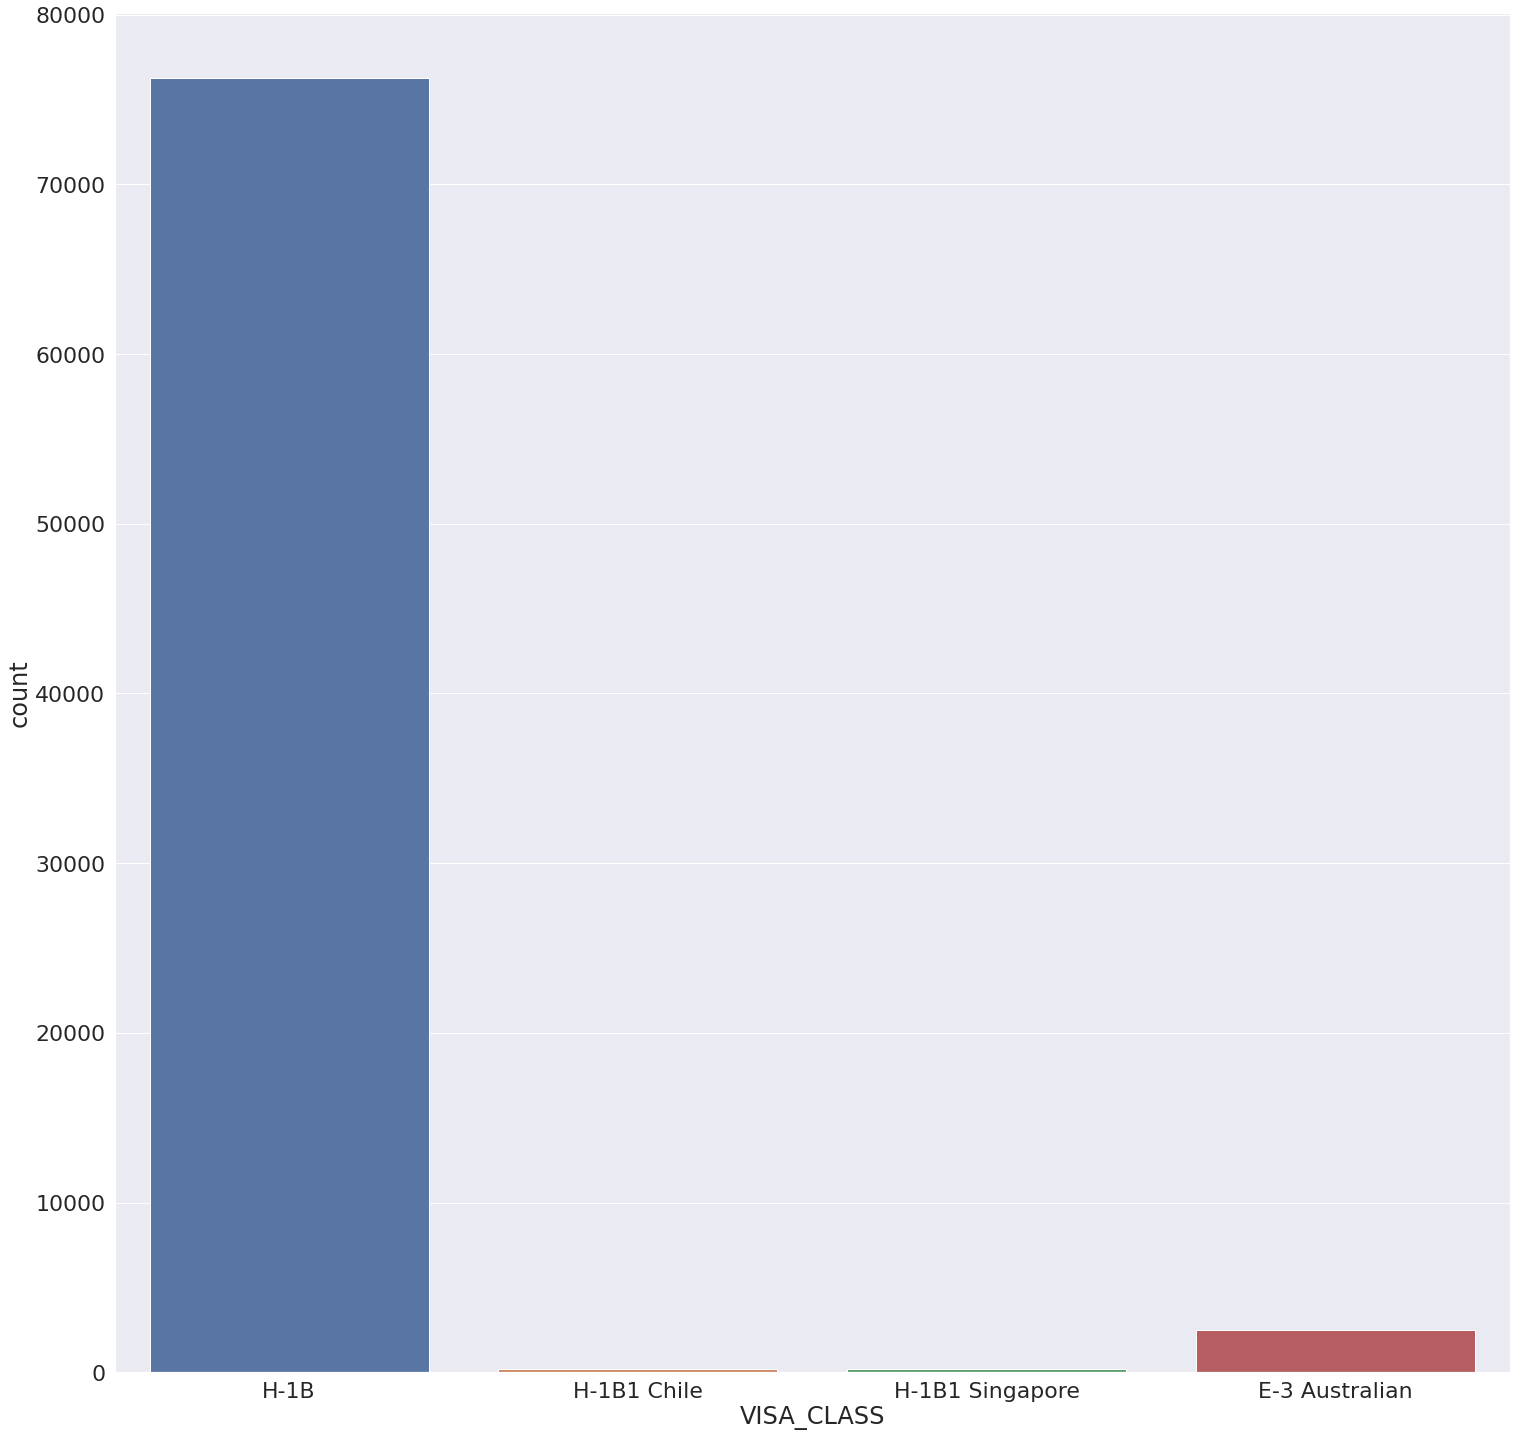

In [26]:
print('Counting certified case status in VISA_Class')
a1=h1b.where(h1b['CASE_STATUS']=='CERTIFIED').dropna()
sns.set(font_scale=2)
sns.countplot(x='VISA_CLASS',data=a1)

Counting certified-withdrawn case status in VISA_Class


<AxesSubplot:xlabel='VISA_CLASS', ylabel='count'>

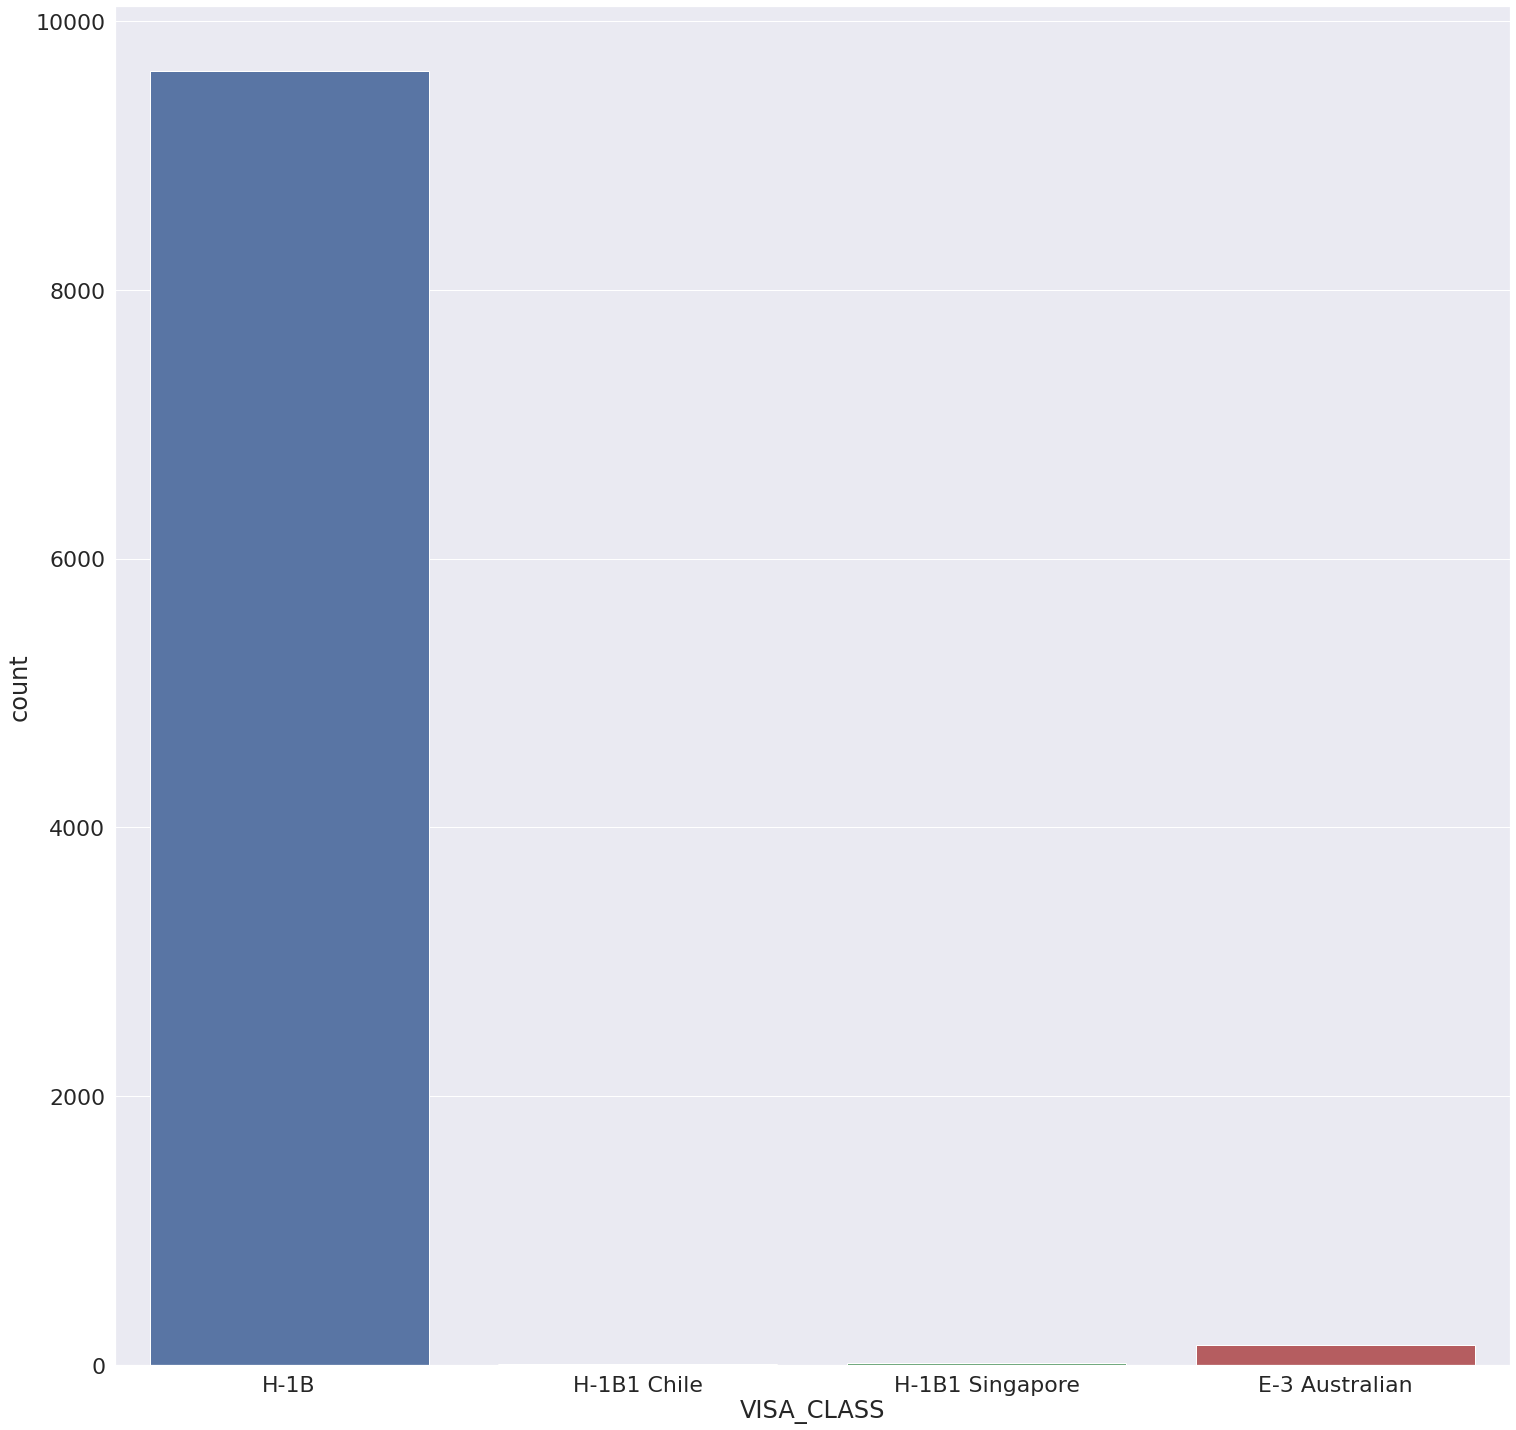

In [27]:
print('Counting certified-withdrawn case status in VISA_Class')
a2=h1b.where(h1b['CASE_STATUS']=='CERTIFIED-WITHDRAWN').dropna()
sns.countplot(x='VISA_CLASS',data=a2)

Counting withdrawn case status in VISA_Class


<AxesSubplot:xlabel='VISA_CLASS', ylabel='count'>

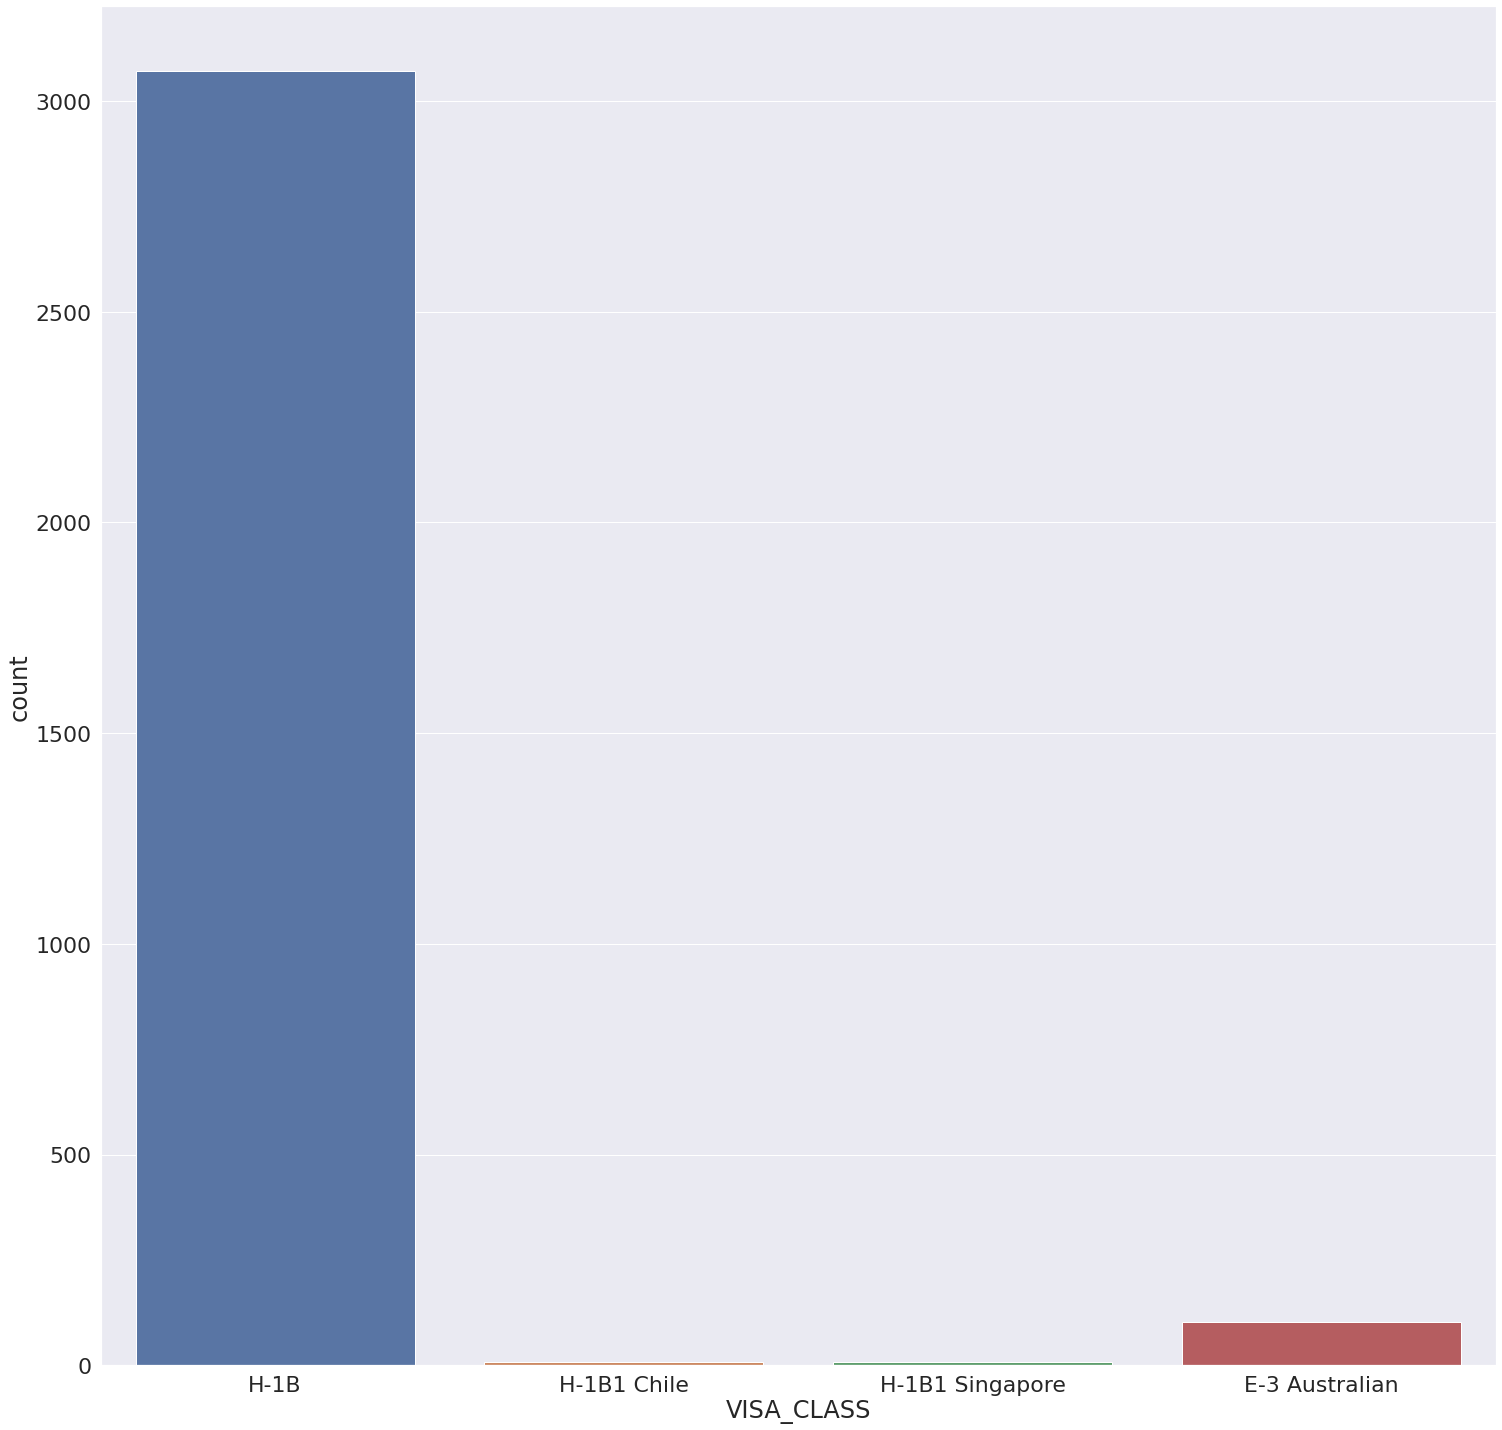

In [29]:
print('Counting withdrawn case status in VISA_Class')
a2=h1b.where(h1b['CASE_STATUS']=='WITHDRAWN').dropna()
sns.countplot(x='VISA_CLASS',data=a2)

Counting Denied case status in VISA_Class


<AxesSubplot:xlabel='VISA_CLASS', ylabel='count'>

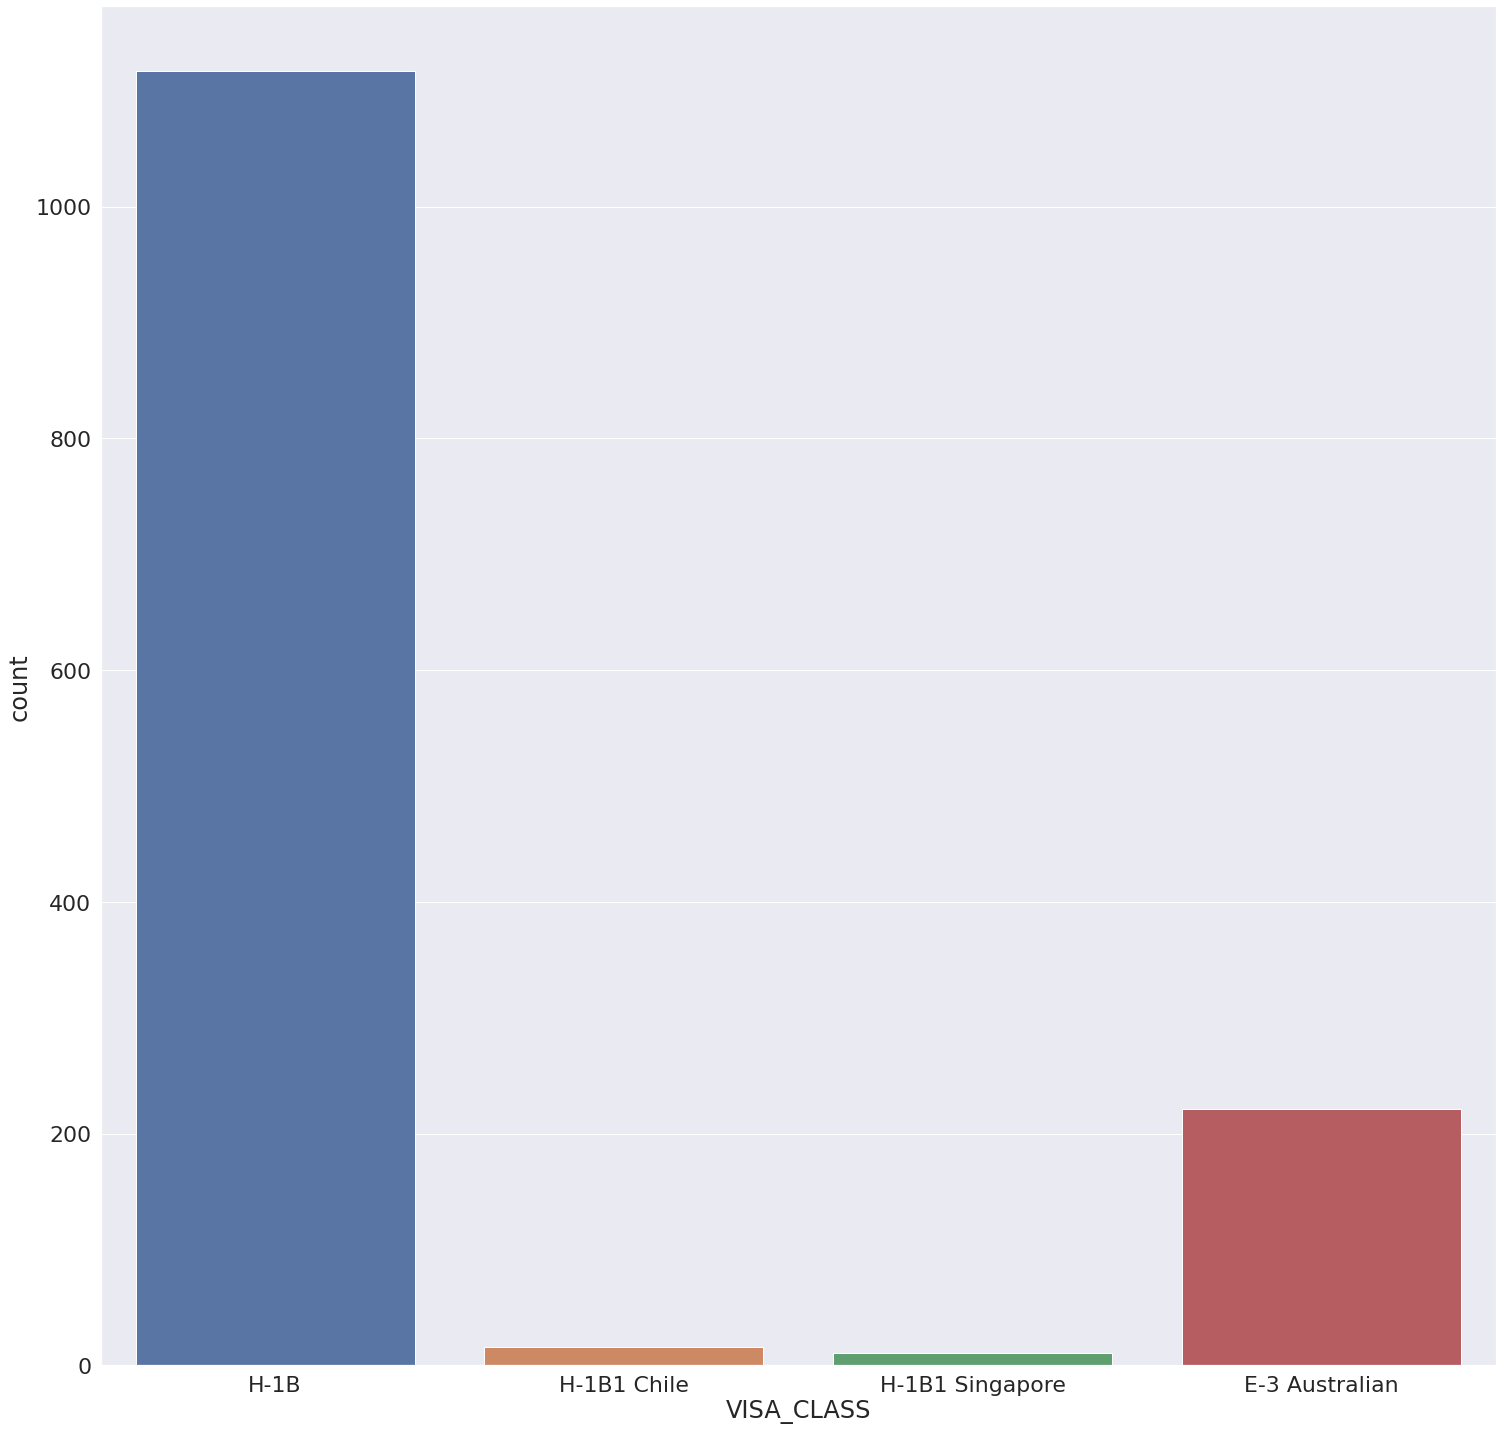

In [44]:
print('Counting Denied case status in VISA_Class')
a2=h1b.where(h1b['CASE_STATUS']=='DENIED').dropna()
sns.countplot(x='VISA_CLASS',data=a2)

Overall Case_status Review


<AxesSubplot:xlabel='CASE_STATUS', ylabel='count'>

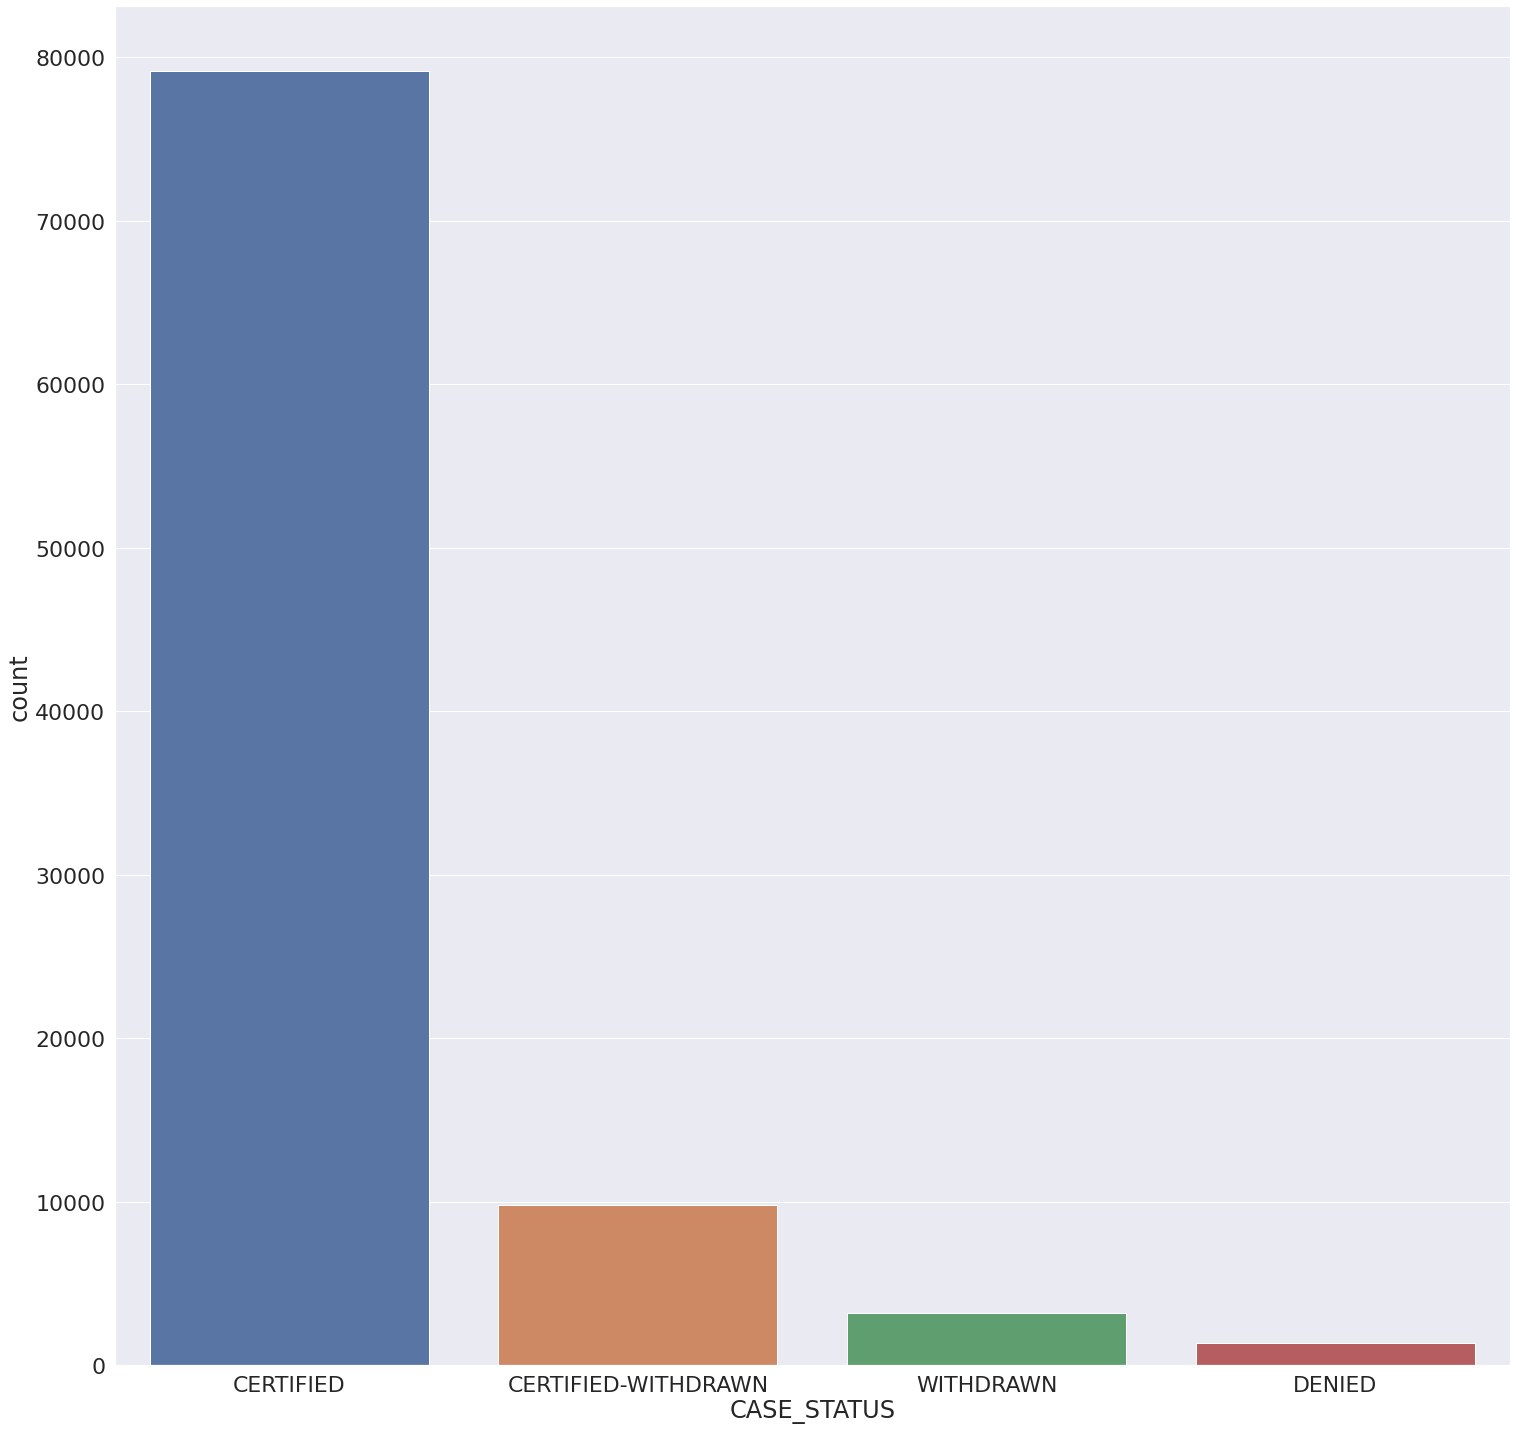

In [46]:
print('Overall Case_status Review')
sns.countplot(x='CASE_STATUS',data=h1b)

Statewise Populations


<AxesSubplot:xlabel='State', ylabel='Population estimate'>

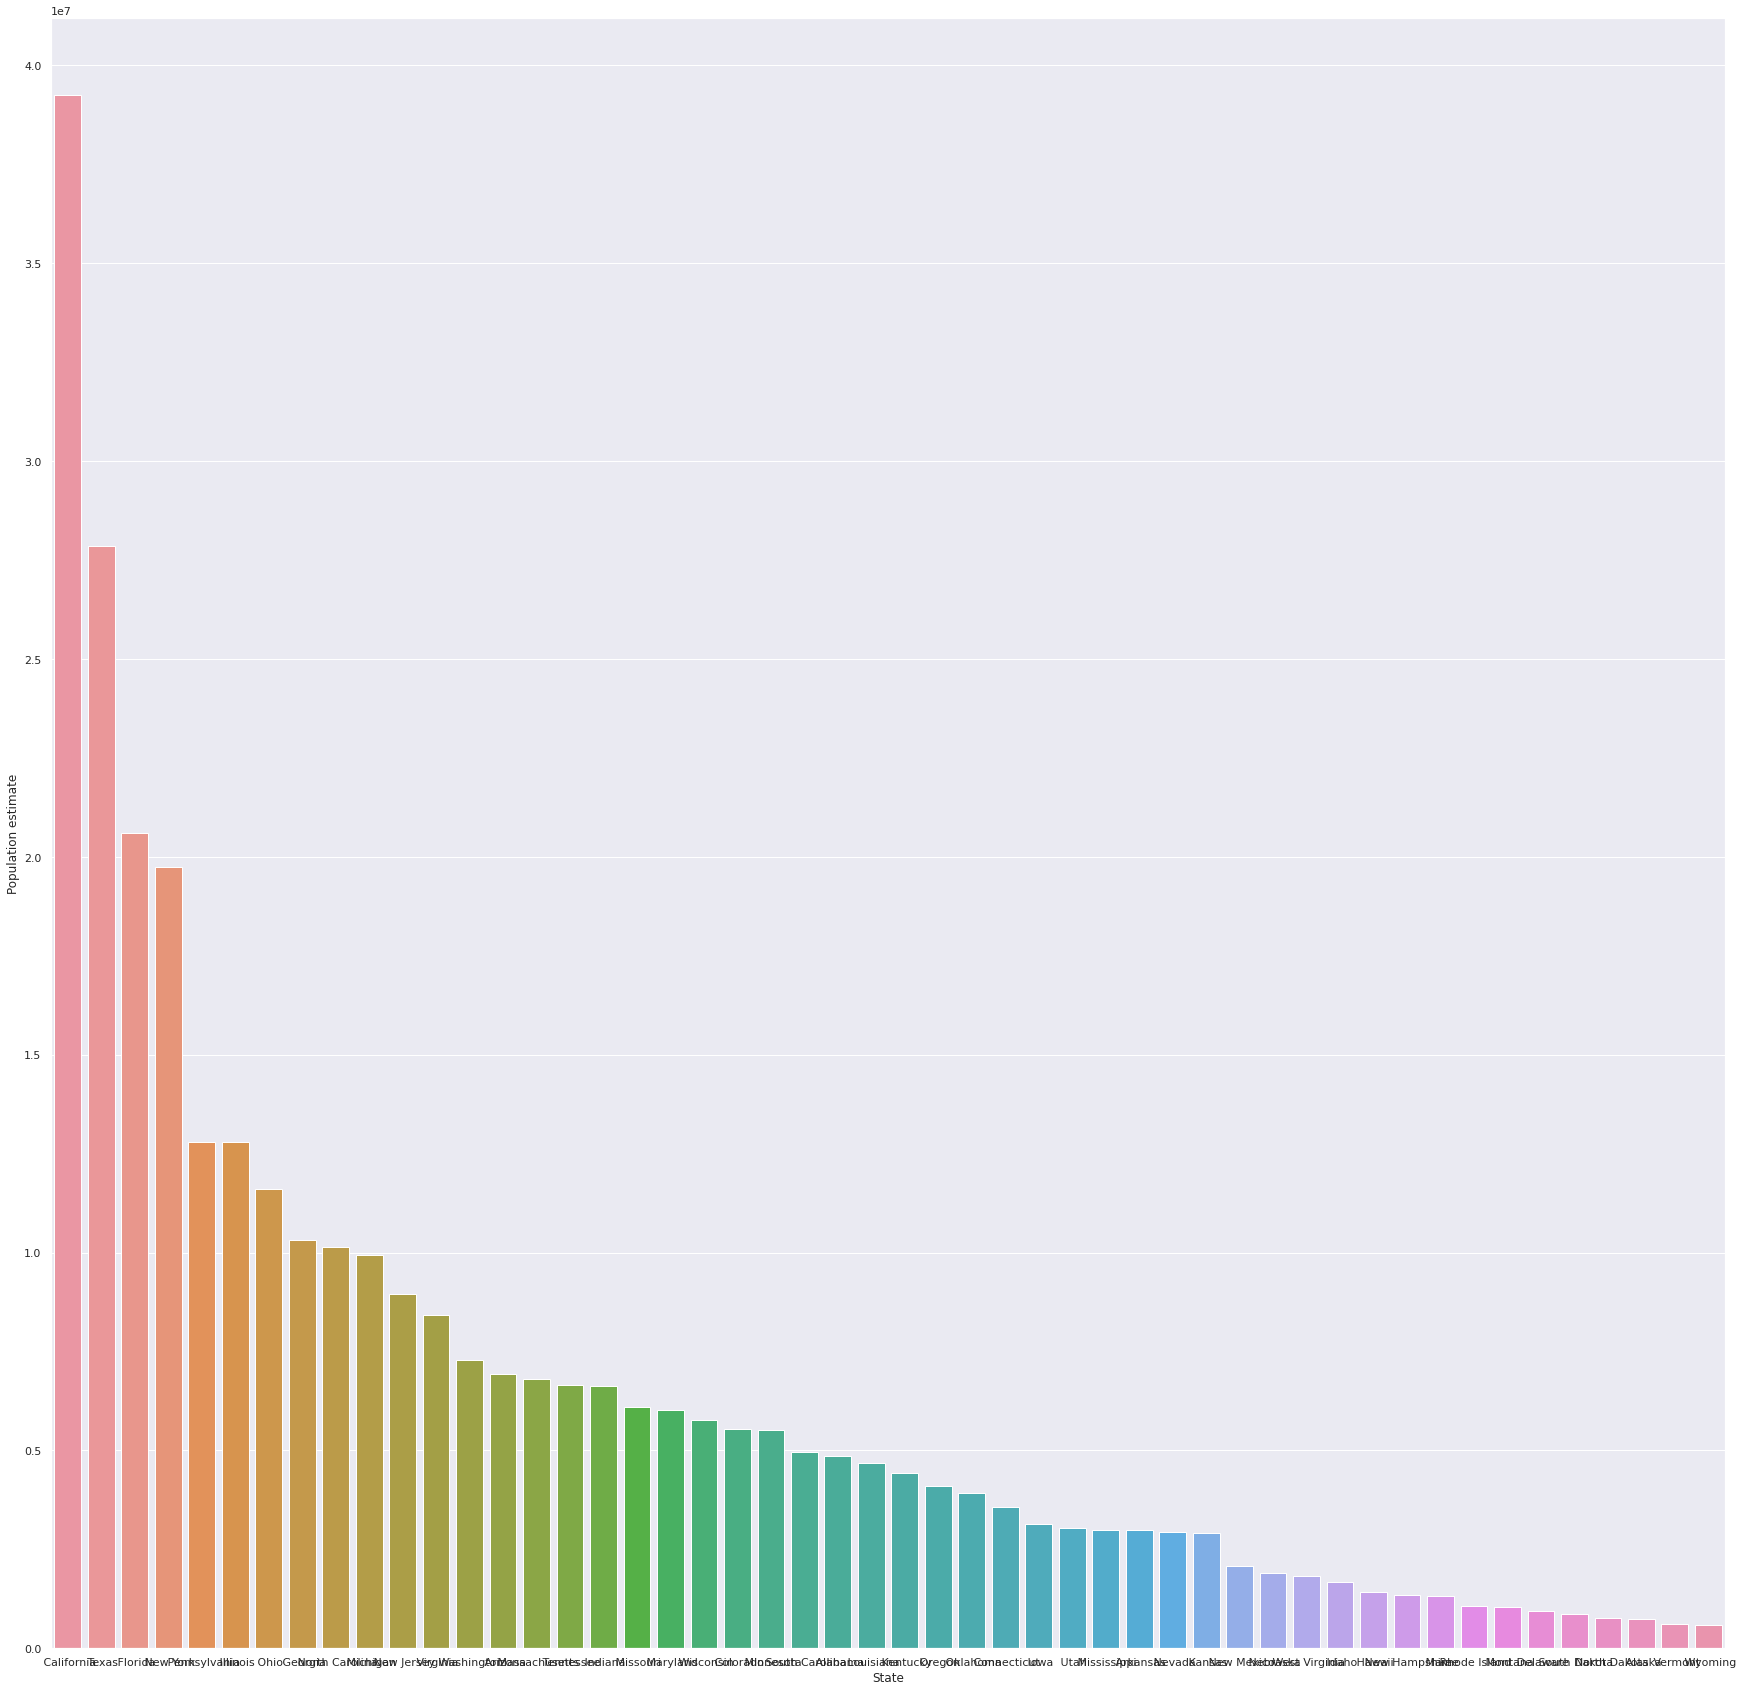

In [52]:
print('Statewise Populations')
sns.set(font_scale=0.5)
sns.set(rc={'figure.figsize':(30,30)})
sns.barplot(x='State',y='Population estimate',data=sp)

In [54]:
print('Top 10 State_Wise Population')
sp.nlargest(10,'Population estimate')

Top 10 State_Wise Population


,EMPLOYER_STATE,State,Population estimate
0,CA,California,39250017
1,TX,Texas,27862596
2,FL,Florida,20612439
3,NY,New York,19745289
4,PA,Pennsylvania,12802503
5,IL,Illinois,12801539
6,OH,Ohio,11614373
7,GA,Georgia,10310371
8,NC,North Carolina,10146788
9,MI,Michigan,9928301
